In [ ]:
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
from tensorflow.keras.applications import VGG16, DenseNet121, ResNet50
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/content/drive/MyDrive/archive/dataset"

# Image data generator for loading images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Constants
img_height, img_width = 224, 224
batch_size = 32

# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
model_resnet = Sequential([
    base_model_resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history_resnet = model_resnet.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the model
val_generator.reset()
resnet_predictions = model_resnet.predict(val_generator)
resnet_report = classification_report(val_generator.classes, np.argmax(resnet_predictions, axis=1))
print("ResNet50 Classification Report:\n", resnet_report)


Found 8250 images belonging to 3 classes.
Found 2060 images belonging to 3 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
258/258 [==============================] - 6626s 26s/step - loss: 1.5521 - accuracy: 0.8735 - val_loss: 1.2949 - val_accuracy: 0.3519
Epoch 2/5
258/258 [==============================] - 6278s 24s/step - loss: 0.1494 - accuracy: 0.9441 - val_loss: 1.0826 - val_accuracy: 0.3505
Epoch 3/5
258/258 [==============================] - 6262s 24s/step - loss: 0.0932 - accuracy: 0.9670 - val_loss: 1.5987 - val_accuracy: 0.5296
Epoch 4/5
229/258 [=========================>....] - ETA: 11:04 - loss: 0.1004 - accuracy: 0.9656

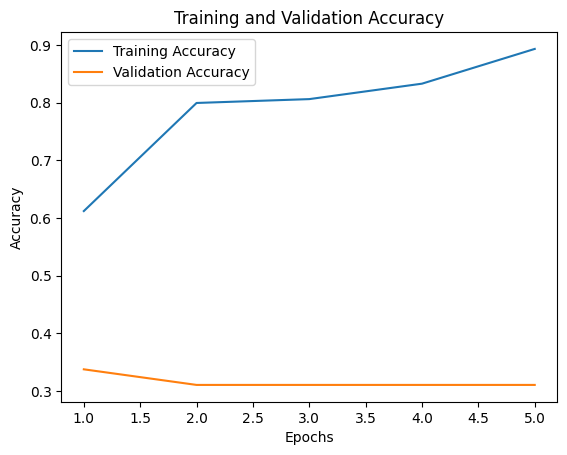

In [ ]:
# Extract accuracy values from history
train_accuracy = history_resnet.history['accuracy']
val_accuracy = history_resnet.history['val_accuracy']

# Plotting accuracy
import matplotlib.pyplot as plt

epochs_range = range(1, epochs+1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

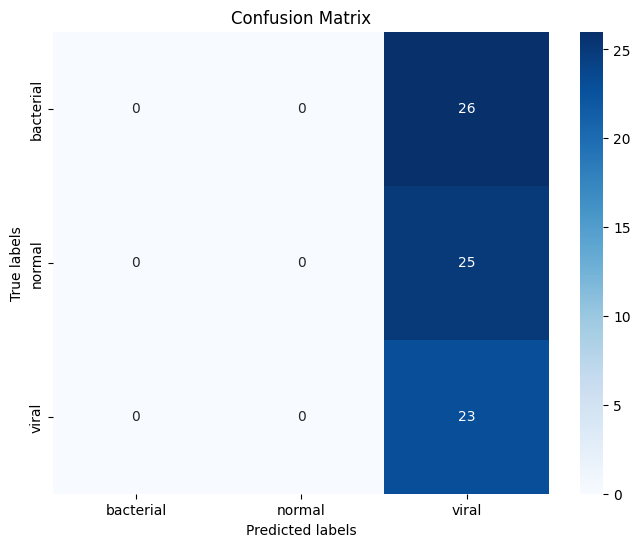

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels
true_labels = val_generator.classes

# Get predicted labels
predicted_labels = np.argmax(resnet_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()